In [2]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import bleedfacedetector as fd
import time
 
# This is the magic command to show matplotlib graphs.
%matplotlib inline

In [3]:
# Set model path
model = 'Model/emotion-ferplus-8.onnx'
# Now read the model
net = cv2.dnn.readNetFromONNX(model)

(-0.5, 999.5, 666.5, -0.5)

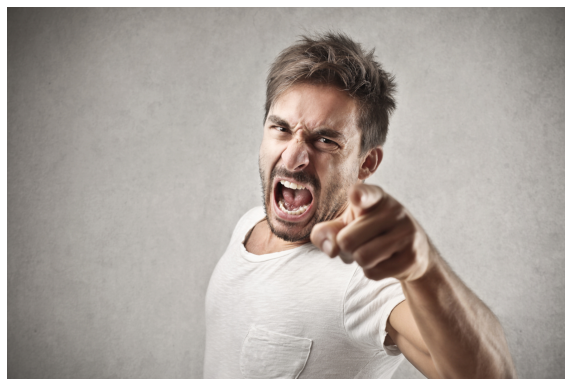

In [4]:
# Read image
image = cv2.imread("Media/emotion1.jpg")
 
# Display image
plt.figure(figsize=[10,10])
plt.imshow(image[:,:,::-1]);plt.axis('off')

In [5]:
# Define the emotions
emotions = ['Neutral', 'Happy', 'Surprise', 'Sad', 'Anger', 'Disgust', 'Fear', 'Contempt']

In [6]:
img_copy = image.copy()
 
# Use SSD detector with 20% confidence threshold.
faces = fd.ssd_detect(img_copy, conf=0.2)
 
# Lets take the coordinates of the first face in the image. 
x,y,w,h = faces[0]
 
# Define padding for face roi
padding = 3
 
# Extract the Face from image with padding.
face = img_copy[y-padding:y+h+padding,x-padding:x+w+padding]

(-0.5, 179.5, 244.5, -0.5)

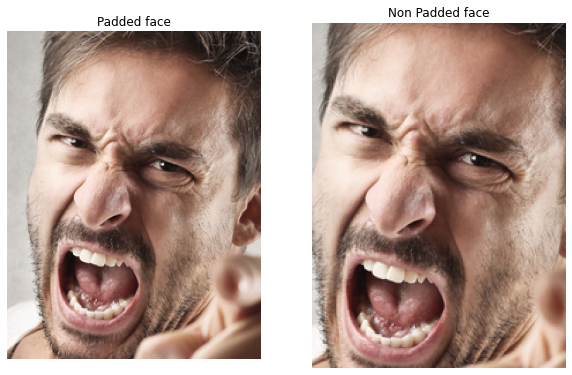

In [7]:
# Non Padded face
face = img_copy[y:y+h, x:x+w] 
 
# Just increasing the padding for demo purpose
padding = 20
 
# Get the Padded face
padded_face = img_copy[y-padding:y+h+padding,x-padding:x+w+padding] 
 
plt.figure(figsize=[10, 10])
plt.subplot(121);plt.imshow(padded_face[...,::-1]);plt.title("Padded face");plt.axis('off')
plt.subplot(122);plt.imshow(face[...,::-1]);plt.title("Non Padded face");plt.axis('off')

In [8]:
# Convert Image into Grayscale
gray = cv2.cvtColor(padded_face,cv2.COLOR_BGR2GRAY)
 
# Resize into 64x64
resized_face = cv2.resize(gray, (64, 64))
 
# Reshape the image into required format for the model 
processed_face = resized_face.reshape(1,1,64,64)

In [9]:
net.setInput(processed_face)

In [10]:
Output = net.forward()

In [11]:
# The output are the scores for each emotion class
print('Shape of Output: {} n'.format(Output.shape))
print(Output)

Shape of Output: (1, 8) n
[[-0.38304734 -0.3524742   0.38017604 -1.0400784   5.511762    0.46380335
  -0.98700744 -3.084895  ]]


In [12]:
scores = Output
print(scores)

[[-0.38304734 -0.3524742   0.38017604 -1.0400784   5.511762    0.46380335
  -0.98700744 -3.084895  ]]


In [13]:
# Compute softmax values for each sets of scores  
expanded = np.exp(scores - np.max(Output))
probablities =  expanded / expanded.sum()
 
# Get the final probablities 
prob = np.squeeze(probablities)
print(prob)

[2.6969565e-03 2.7806847e-03 5.7854583e-03 1.3980701e-03 9.7939360e-01
 6.2900856e-03 1.4742713e-03 1.8091586e-04]


In [14]:
# Get the index of the max probability, use that index to get the predicted emotion in the 
# emotions list you created above.
predicted_emotion = emotions[prob.argmax()]
 
# Print the target Emotion
print('Predicted Emotion is: {}'.format(predicted_emotion ))

Predicted Emotion is: Anger


(-0.5, 999.5, 666.5, -0.5)

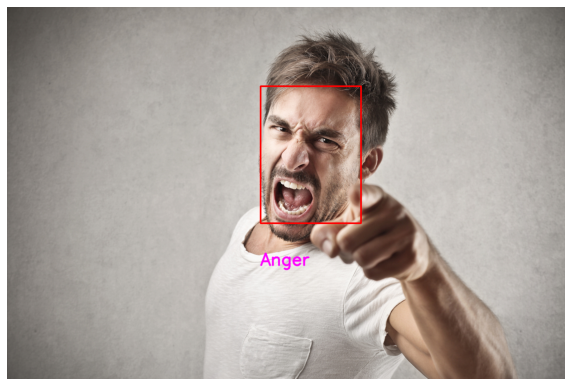

In [15]:
# Write predicted emotion on image
cv2.putText(img_copy,'{}'.format(predicted_emotion),(x,y+h+75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,255), 2, cv2.LINE_AA)
 
# Draw rectangular box on detected face
cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,0,255),2)
 
# Display image
plt.figure(figsize=(10,10))
plt.imshow(img_copy[:,:,::-1]);plt.axis("off")

In [16]:
def init_emotion(model="Model/emotion-ferplus-8.onnx"):
    
    # Set global variables
    global net,emotions
    
    # Define the emotions
    emotions = ['Neutral', 'Happy', 'Surprise', 'Sad', 'Anger', 'Disgust', 'Fear', 'Contempt']
    
    # Initialize the DNN module
    net = cv2.dnn.readNetFromONNX(model)

In [17]:
def emotion(image,returndata=False):
    
    # Make copy of  image
    img_copy = image.copy()
    
    # Detect faces in image
    faces = fd.ssd_detect(img_copy,conf=0.2)
    
    # Define padding for face ROI
    padding = 3 
    
    # Iterate process for all detected faces
    for x,y,w,h in faces:
        
        # Get the Face from image
        face = img_copy[y-padding:y+h+padding,x-padding:x+w+padding]
        
        # Convert the detected face from BGR to Gray scale
        gray = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        
        # Resize the gray scale image into 64x64
        resized_face = cv2.resize(gray, (64, 64))
        
        # Reshape the final image in required format of model
        processed_face = resized_face.reshape(1,1,64,64)
        
        # Input the processed image
        net.setInput(processed_face)
        
        # Forward pass
        Output = net.forward()
 
        # Compute softmax values for each sets of scores  
        expanded = np.exp(Output - np.max(Output))
        probablities =  expanded / expanded.sum()
        
        # Get the final probablities by getting rid of any extra dimensions 
        prob = np.squeeze(probablities)
        
        # Get the predicted emotion
        predicted_emotion = emotions[prob.argmax()]
       
        # Write predicted emotion on image
        cv2.putText(img_copy,'{}'.format(predicted_emotion),(x,y+h+(1*20)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
        # Draw a rectangular box on the detected face
        cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,0,255),2)
    
    if  returndata:
        # Return the the final image if return data is True
        return img_copy
 
    else:
        # Displpay the image
        plt.figure(figsize=(10,10))
        plt.imshow(img_copy[:,:,::-1]);plt.axis("off")

In [18]:
init_emotion()

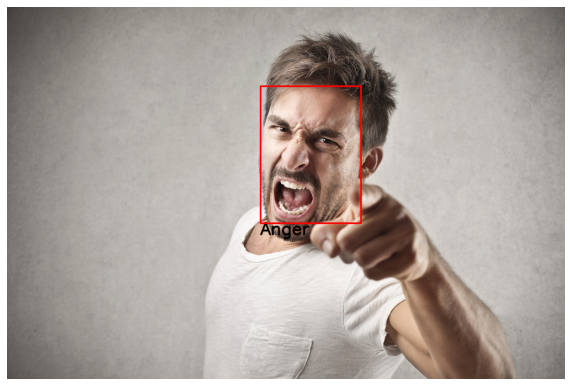

In [19]:
image = cv2.imread("Media/emotion1.jpg")
emotion(image)

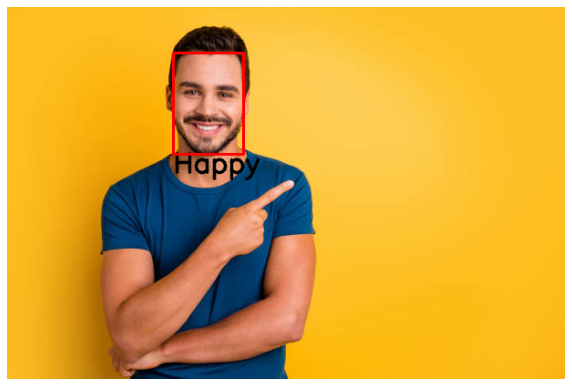

In [20]:
image = cv2.imread("Media/emotion2.jpg")
emotion(image)

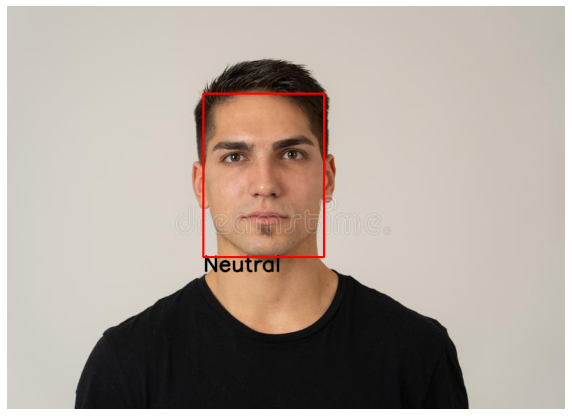

In [21]:
image = cv2.imread("Media/emotion3.jpg")
emotion(image)

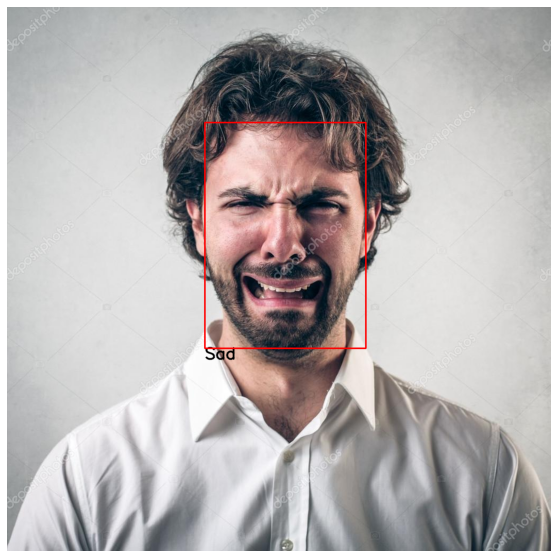

In [22]:
image = cv2.imread("Media/emotion4.jpg")
emotion(image)

In [23]:
fps=0
init_emotion()
 
# If you want to use the webcam the pass 0
cap = cv2.VideoCapture(0)
 
 
while(True):    
    
    start_time = time.time()
    ret,frame=cap.read() 
    
    if not ret:
        break
        
    image = cv2.flip(frame,1)
    
    image = emotion(image, returndata=True)
    
    cv2.putText(image, 'FPS: {:.2f}'.format(fps), (10, 20), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 20, 55), 1)
    cv2.imshow("Emotion Recognition",image)
    
    k = cv2.waitKey(1)
    fps= (1.0 / (time.time() - start_time))
    
    if k == ord('q'):
        break
cap.release() 
cv2.destroyAllWindows() 